In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

from sklearn.linear_model import LinearRegression

In [2]:
df_20 = pd.read_csv("C:/Users/Schlenker18/Documents/GitHub/2021-Fantasy-Football-Rankings/WebScrapers/TeStats2020.csv")
df_21 = pd.read_csv("C:/Users/Schlenker18/Documents/GitHub/2021-Fantasy-Football-Rankings/WebScrapers/TeStats2021.csv")

In [3]:
df_20 = df_20[df_20.G >= 12].reset_index(drop=True)
df_20.head()

,RANK,PLAYER,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1,Travis Kelce (KC),105,145,"1,416",13.5,45,0,11,0,0,0,1,15,207.8,13.9,99.9%
1,2,Darren Waller (LV),107,145,"1,196",11.2,38,0,9,0,0,0,2,16,171.6,10.7,99.0%
2,3,Robert Tonyan (GB),52,59,586,11.3,45,0,11,0,0,0,0,16,124.6,7.8,32.5%
3,4,Mark Andrews (BAL),58,88,701,12.1,39,0,7,0,0,0,0,14,112.1,8.0,99.9%
4,5,T.J. Hockenson (DET),67,101,723,10.8,51,0,6,1,0,0,1,16,108.3,6.8,95.8%


In [4]:
df_21 = df_21[df_21.G >=12].reset_index(drop=True)
df_21.head()

,RANK,PLAYER,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1,Mark Andrews (BAL),107,153,"1,361",12.7,43,0,9,1,0,0,0,17,194.1,11.4,99.9%
1,2,Travis Kelce (KC),92,134,"1,125",12.2,69,0,9,2,3,1,1,16,170.8,10.7,99.9%
2,3,Dalton Schultz (DAL),78,104,808,10.4,32,0,8,0,0,0,0,17,130.8,7.7,96.6%
3,4,George Kittle (SF),71,94,910,12.8,48,0,6,3,20,0,1,14,127.0,9.1,98.6%
4,5,Rob Gronkowski (FA),55,88,802,14.6,42,0,6,0,0,0,0,12,116.2,9.7,49.4%


In [8]:
df_20.loc[0:49, 'FPTS/G'].corr(df_21.loc[0:49, 'FPTS/G'])

0.9561446276381584

In [9]:
x = df_20['FPTS/G'][0:50].values.reshape(-1,1)

y = df_21['FPTS/G'][0:50].values.reshape(-1,1)

reg = LinearRegression().fit(x,y)
reg.score(x,y)

0.9142125489613122

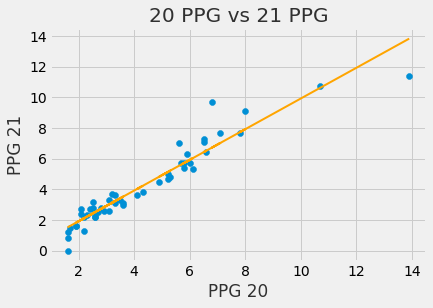

In [12]:
plt.figure()

plt.scatter(x=df_20.loc[0:49,'FPTS/G'], y = df_21.loc[0:49, 'FPTS/G'])

yhat = reg.coef_ * x + reg.intercept_
plt.plot(x, yhat, lw=2, c='orange')

plt.xlabel('PPG 20', alpha = .8)
plt.ylabel('PPG 21', alpha=0.8)
plt.title('20 PPG vs 21 PPG', alpha = 0.8)
plt.style.use('fivethirtyeight')


plt.show()

In [13]:
def predict_ppg(x):
    score = np.array([[x]])
    prediction = reg.predict(score)
    
    return prediction[0,0]

In [23]:
df_21 = pd.read_csv("C:/Users/Schlenker18/Documents/GitHub/2021-Fantasy-Football-Rankings/WebScrapers/TeStats2021.csv")

In [24]:
df_22 = df_21.copy()
df_22 = df_22[['PLAYER', 'FPTS/G']]
df_22['FPTS/G 22'] = 0
df_22.head()

,PLAYER,FPTS/G,FPTS/G 22
0,Mark Andrews (BAL),11.4,0
1,Travis Kelce (KC),10.7,0
2,Dalton Schultz (DAL),7.7,0
3,George Kittle (SF),9.1,0
4,Rob Gronkowski (FA),9.7,0


In [25]:
df_22['FPTS/G 22'] = df_22.apply(lambda x: predict_ppg(x['FPTS/G']), axis = 1)
df_22['FPTS 22'] = np.round(df_22['FPTS/G 22'] * 17,2)
df_22.sort_values('FPTS 22', ascending=False, inplace=True)
df_22.reset_index(drop = True, inplace = True)
df_22.index = df_22.index + 1
df_22.head(10)

,PLAYER,FPTS/G,FPTS/G 22,FPTS 22
1,Mark Andrews (BAL),11.4,11.318226,192.41
2,Travis Kelce (KC),10.7,10.618401,180.51
3,Rob Gronkowski (FA),9.7,9.618651,163.52
4,George Kittle (SF),9.1,9.018801,153.32
5,Dalton Schultz (DAL),7.7,7.619151,129.53
6,Dawson Knox (BUF),7.7,7.619151,129.53
7,Dallas Goedert (PHI),7.3,7.219251,122.73
8,Darren Waller (LV),7.1,7.019301,119.33
9,Logan Thomas (WAS),7.1,7.019301,119.33
10,Hunter Henry (NE),7.1,7.019301,119.33


In [26]:
df_22.to_csv('te_rankings.csv')